In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
import numpy as np
plt.style.use(astropy_mpl_style)

In [2]:
%matplotlib inline

In [3]:
path1 = r'20190405T110036.fits.fz'
path2 = r'20190405T110332.fits.fz'
path3 = r'20190405T110633.fits.fz'

In [4]:
def get_hdul_imgHDU_and_wcs(path_to_fits):
    hdul = fits.open(path_to_fits)
    image_hdu = hdul[1]
    wcs = WCS(image_hdu.header)
    return hdul,image_hdu,wcs
        

In [5]:
hdul1,image_hdu1,wcs1 = get_hdul_imgHDU_and_wcs(path1)
hdul2,image_hdu2,wcs2 = get_hdul_imgHDU_and_wcs(path2)
hdul3,image_hdu3,wcs3 = get_hdul_imgHDU_and_wcs(path3)

In [24]:
def print_shift(reference_pixels,image_pixels):
    assert len(reference_pixels)==len(image_pixels)
    for ii in range(len(reference_pixels)):
        x_shift,y_shift = reference_pixels[ii]-image_pixels[ii]
        print('For reference_pixel {0}, x_shift is {1} and y_shift is {2}'.format(ii,x_shift,y_shift))

In [6]:
from reproject import reproject_interp

<b>Note</b> The reproject package doesn't support SIP as of now.
see [issue](https://github.com/astropy/reproject/issues/171)
This invalidates the below steps.<br>
The reprojection is taking too long anyway. Nearly a minute for one image.<br>
ds9 manages to match multiple frames to one wcs header instantaneously. <b>How ?</b>

In [19]:
# Reproject image_hdu2 onto image_hdu1

array,footprint = reproject_interp(image_hdu2,wcs1,shape_out = image_hdu1.shape,order=0)

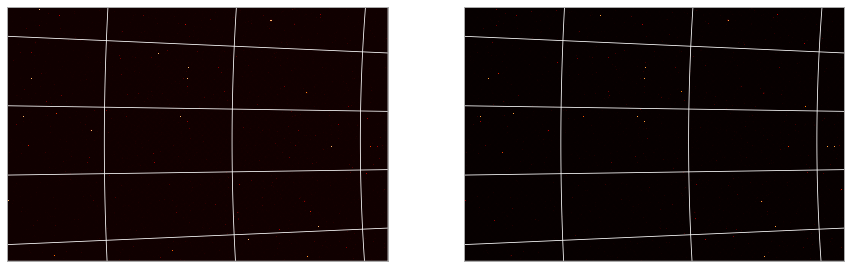

In [20]:
plt.rcParams['figure.figsize'] = [15,15]
ax1 = plt.subplot(1,2,1, projection=wcs1)
ax1.imshow(array, origin='lower')
ax1.coords.grid(color='white')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')


ax2 = plt.subplot(1,2,2, projection=wcs1)
ax2.imshow(image_hdu1.data, origin='lower')
ax2.coords.grid(color='white')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')

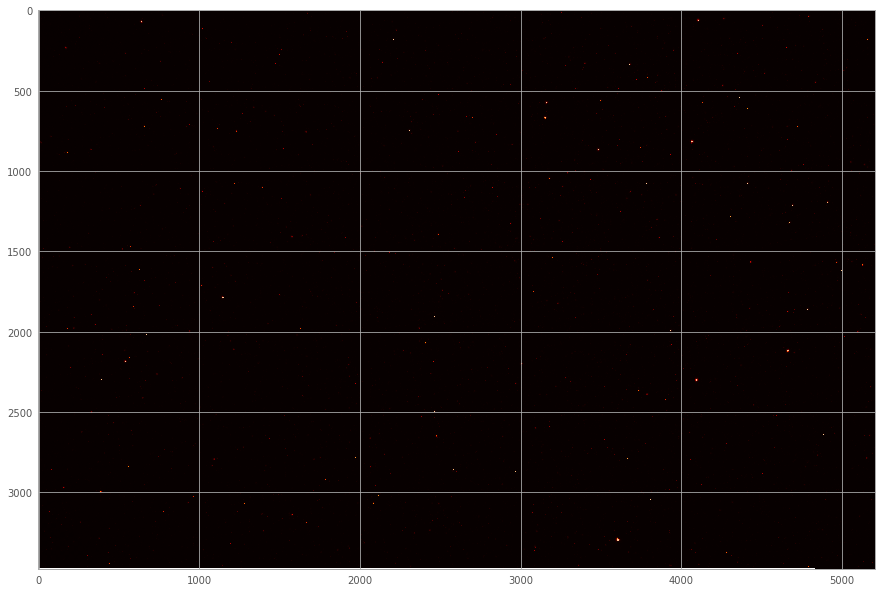

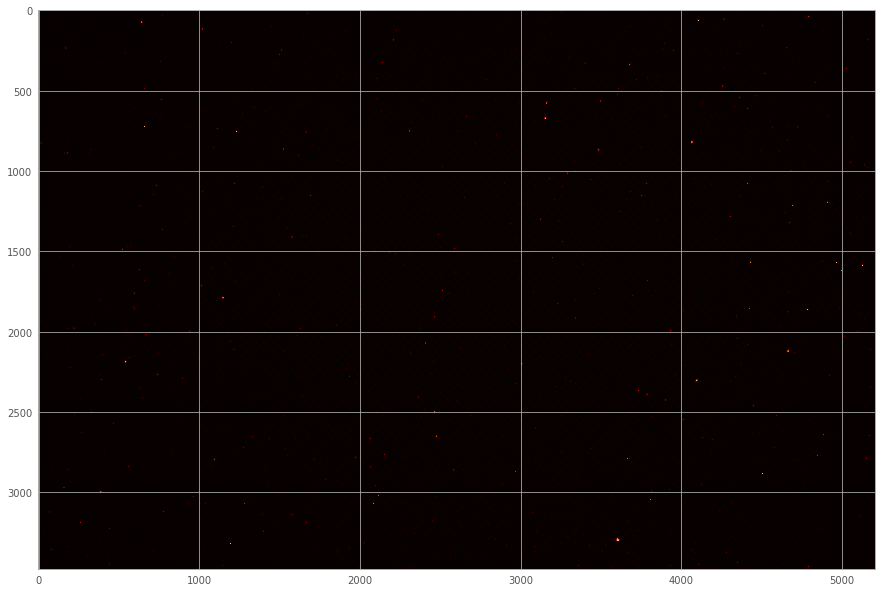

In [22]:
plt.imshow((array + image_hdu1.data)/2)
plt.figure()
plt.imshow((image_hdu1.data+image_hdu2.data)/2)

It seems the greater the distance from the center, greater is the shift. 

### Ignore below

In [26]:
reference_pixels = [[2604,1700],[2602,1712],[2580,1722],[2300,1600]] #[[x,y]] 

In [27]:
reference_world_coordinates = wcs1.all_pix2world(reference_pixels,1)
# Get pixel values in images 2 and 3 with the same coordinates
pixels_with_reference_coords_1 = wcs2.all_world2pix(reference_world_coordinates,1)
pixels_with_reference_coords_2 = wcs3.all_world2pix(reference_world_coordinates,1)

In [28]:
print('Between image 1 and image 2')
print_shift(reference_pixels,pixels_with_reference_coords_1)
print('\nBetween image 1 and image 3')
print_shift(reference_pixels,pixels_with_reference_coords_1)

Between image 1 and image 2
For reference_pixel 0, x_shift is 0.07305847275119959 and y_shift is -3.115030300623175
For reference_pixel 1, x_shift is 0.07194780935969902 and y_shift is -3.116035684471399
For reference_pixel 2, x_shift is 0.07229725723345837 and y_shift is -3.1191111032048866
For reference_pixel 3, x_shift is 0.10141022413881728 and y_shift is -3.1401492937727653

Between image 1 and image 3
For reference_pixel 0, x_shift is 0.07305847275119959 and y_shift is -3.115030300623175
For reference_pixel 1, x_shift is 0.07194780935969902 and y_shift is -3.116035684471399
For reference_pixel 2, x_shift is 0.07229725723345837 and y_shift is -3.1191111032048866
For reference_pixel 3, x_shift is 0.10141022413881728 and y_shift is -3.1401492937727653


#### After the pixels with RA and DEC corresponding to reference pixels in image 1 are found, find the shift